<a href="https://colab.research.google.com/github/rubeshajith/NYC-taxi-trip-time-prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [239]:
df = pd.read_csv("/content/drive/MyDrive/data/project/NYC Taxi Data.csv")

In [240]:
df.shape

(1458644, 11)

In [123]:
df[df.isnull()].sum()

id                      0
vendor_id             0.0
pickup_datetime         0
dropoff_datetime        0
passenger_count       0.0
pickup_longitude      0.0
pickup_latitude       0.0
dropoff_longitude     0.0
dropoff_latitude      0.0
store_and_fwd_flag      0
trip_duration         0.0
dtype: object

In [124]:
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [126]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [127]:
import datetime as dt

Converting datatype from object to datetime, So that we can use them for creating separate features 

In [241]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])

In [242]:
df["pickup_day"] = df["pickup_datetime"].dt.day_name()
df["dropoff_day"] = df["dropoff_datetime"].dt.day_name()

In [243]:
df["pickup_day_no"] = df["pickup_day"].map({"Sunday":0, "Monday":1, "Tuesday":2, "Wednesday": 3, "Thursday": 4, "Friday":5, "Saturday":6})
df["dropoff_day_no"] = df["dropoff_day"].map({"Sunday":0, "Monday":1, "Tuesday":2, "Wednesday": 3, "Thursday": 4, "Friday":5, "Saturday":6})

In [244]:
df["pickup_hour"] = df["pickup_datetime"].dt.hour
df["dropoff_hour"] = df["dropoff_datetime"].dt.hour

In [245]:
df["pickup_month"] = df["pickup_datetime"].dt.month
df["dropoff_month"] = df["dropoff_datetime"].dt.month

In [246]:
def time_of_the_day(x):
  if x in range(6,12):
    return "Morning"
  elif x in range(12,16):
    return "Afternoon"
  elif x in range(16,22):
    return "Evening"
  else: 
    return "Night"

In [247]:
df["pickup_time_of_the_day"] = df["pickup_hour"].apply(time_of_the_day)
df["dropoff_time_of_the_day"] = df["dropoff_hour"].apply(time_of_the_day)

In [248]:
from geopy.distance import great_circle

In [249]:
def cal_distance(pickup_latitude,pickup_logitude,dropoff_latitude,dropoff_longitude):
  start_coordinates = (pickup_latitude, pickup_logitude)
  stop_coordinates = (dropoff_latitude,dropoff_longitude)
  return great_circle(start_coordinates, stop_coordinates).miles

In [250]:
df["distance"] = df.apply(lambda x : cal_distance(x["pickup_latitude"],x["pickup_longitude"],x["dropoff_latitude"],x["dropoff_longitude"]),axis=1)

### **Univariate Analysis**

**trip_duration**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


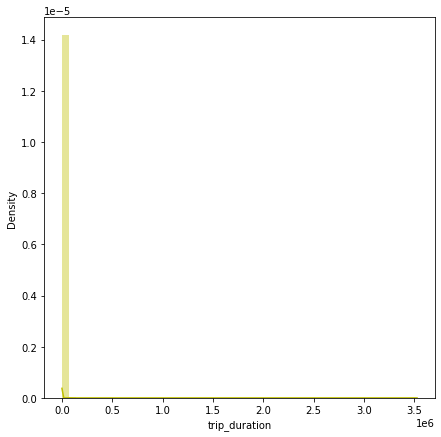

In [20]:
plt.figure(figsize=(7,7))
sns.distplot(df['trip_duration'],color="y")


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


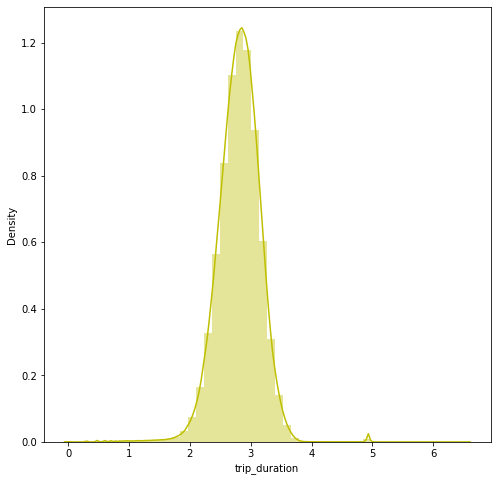

In [21]:
plt.figure(figsize= (8,8))
sns.distplot(np.log10(df.trip_duration), color="y")

After log transformation we can see that our targer variable is normally distrubuted


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


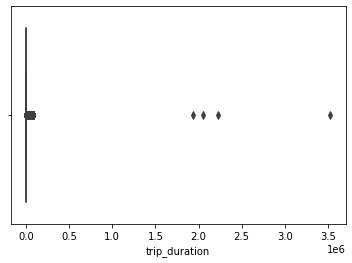

In [24]:
sns.boxplot(df.trip_duration)

We can see few outliers is our target variable


In [267]:
trip_duration_outliers = df['trip_duration'].sort_values(ascending= False).reset_index()
trip_duration_outliers[:4]

,index,trip_duration
0,1234291,86392
1,295382,86391
2,73816,86390
3,59891,86387


This 4 data points where the outliers that we detected in boxplot

In [220]:
pd.reset_option("all")

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:630: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:630: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [256]:
pd.set_option("display.max_rows", 200)


In [258]:
pd.set_option("display.min_rows", 50)
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1, max(df.trip_duration)+3600,3600))).count()


trip_duration
(1, 3601]             1446313
(3601, 7201]            10045
(7201, 10801]             141
(10801, 14401]             35
(14401, 18001]              5
(18001, 21601]             11
(21601, 25201]             11
(25201, 28801]             13
(28801, 32401]             17
(32401, 36001]              8
(36001, 39601]             13
(39601, 43201]              6
(43201, 46801]              8
(46801, 50401]              5
(50401, 54001]              7
(54001, 57601]              5
(57601, 61201]             10
(61201, 64801]             10
(64801, 68401]             10
(68401, 72001]              5
(72001, 75601]             10
(75601, 79201]             17
(79201, 82801]             63
(82801, 86401]           1839
(86401, 90001]              0
                       ...   
(3438001, 3441601]          0
(3441601, 3445201]          0
(3445201, 3448801]          0
(3448801, 3452401]          0
(3452401, 3456001]          0
(3456001, 3459601]          0
(3459601, 3463201]        

In [139]:
df[df.trip_duration > 86400].head

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_time_of_the_day,dropoff_time_of_the_day,distance
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,...,Wednesday,2,3,0,11,1,1,Night,Morning,12.519817
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,...,Tuesday,6,2,22,15,2,3,Night,Afternoon,3.717350
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,...,Sunday,2,0,6,1,1,1,Morning,Night,1.016023
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,...,Friday,6,5,22,18,2,3,Night,Evening,12.365715


In [269]:
df.shape

(1450045, 22)

In [235]:
df[df.trip_duration < 60].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_time_of_the_day,dropoff_time_of_the_day,distance
72,id1510700,2,2016-02-20 21:58:13,2016-02-20 21:59:10,1,-73.958397,40.772629,-73.955132,40.774242,N,...,Saturday,6,6,21,21,2,2,Evening,Evening,0.204017
323,id2954399,1,2016-06-27 11:22:37,2016-06-27 11:23:17,1,-74.001030,40.756653,-74.000999,40.756626,N,...,Monday,1,1,11,11,6,6,Morning,Morning,0.002440
842,id3263580,2,2016-05-21 12:46:46,2016-05-21 12:46:49,2,-73.782372,40.648766,-73.782372,40.648746,N,...,Saturday,6,6,12,12,5,5,Afternoon,Afternoon,0.001318
853,id2730154,2,2016-03-29 22:39:46,2016-03-29 22:40:44,5,-73.982201,40.731812,-73.979950,40.734814,N,...,Tuesday,2,2,22,22,3,3,Night,Night,0.238563
1107,id0729156,2,2016-06-23 13:36:48,2016-06-23 13:36:50,3,-73.827660,40.716175,-73.822113,40.711452,N,...,Thursday,4,4,13,13,6,6,Afternoon,Afternoon,0.436865


In [263]:
df[~df.trip_duration < 60]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_time_of_the_day,dropoff_time_of_the_day,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,1,1,17,17,3,3,Evening,Evening,0.931139
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,0,0,0,0,6,6,Night,Night,1.121892
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,Tuesday,2,2,11,12,1,1,Morning,Afternoon,3.967522
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,3,3,19,19,4,4,Evening,Evening,0.923047
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,6,6,13,13,3,3,Afternoon,Afternoon,0.738556
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,...,Saturday,6,6,22,22,1,1,Night,Night,0.682852
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,...,Friday,5,5,22,22,6,6,Night,Night,0.824112
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,...,Saturday,6,6,7,8,5,5,Morning,Morning,3.551129
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,...,Friday,5,5,23,23,5,5,Night,Night,0.814217
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,...,Thursday,4,4,21,22,3,3,Evening,Night,3.182147


In [268]:
df = df[df.trip_duration <= 86400]
df = df[df.trip_duration >= 60]

**distance**

In [85]:
df.distance.describe()

count    1.458639e+06
mean     2.138062e+00
std      2.669751e+00
min      0.000000e+00
25%      7.654306e-01
50%      1.300982e+00
75%      2.408027e+00
max      7.710660e+02
Name: distance, dtype: float64

In [92]:
print("Total number of trips with 0 distance are {}".format(df.distance[df["distance"] == 0].count()))

Total number of trips with 0 distance are 5895


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


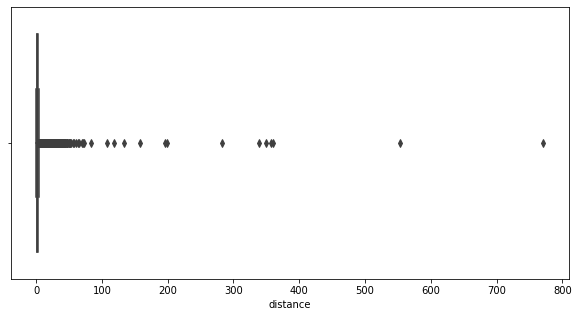

In [91]:
plt.figure(figsize = (10,5))
sns.boxplot(df.distance)
plt.show()

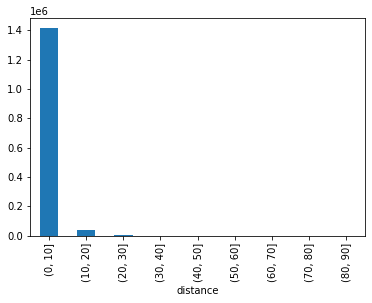

In [100]:
df.distance.groupby(pd.cut(df.distance, np.arange(0,100,10))).count().plot(kind= "bar")

  **vendor id**

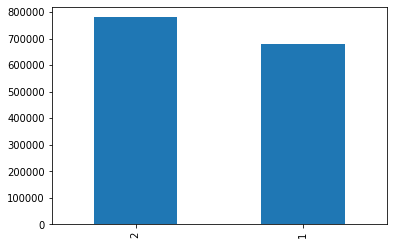

In [33]:
df["vendor_id"].value_counts().plot(kind="bar")

**Passenger Count**

In [77]:
df['passenger_count'].value_counts()

1    1033600
2     210318
5      78088
3      59896
6      48333
4      28404
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [76]:
df["passenger_count"] = df['passenger_count'].map(lambda x: 1 if x == 0 else x)

In [80]:
df.shape

(1458639, 22)

In [79]:
df = df[df["passenger_count"] <= 6]

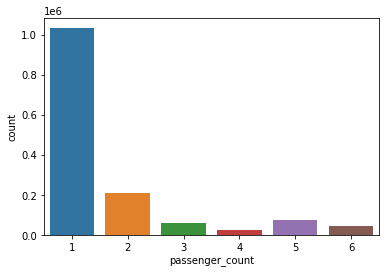

In [81]:
sns.countplot(x="passenger_count", data= df)

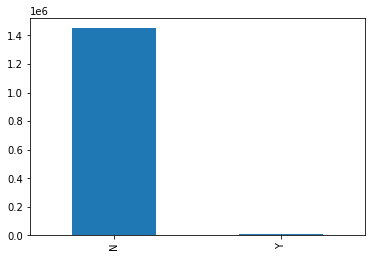

In [39]:
df['store_and_fwd_flag'].value_counts().plot(kind= "bar")

In [47]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_time_of_the_day,dropoff_time_of_the_day,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,1,1,17,17,3,3,Evening,Evening,0.931139
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,0,0,0,0,6,6,Night,Night,1.121892
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,Tuesday,2,2,11,12,1,1,Morning,Afternoon,3.967522
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,3,3,19,19,4,4,Evening,Evening,0.923047
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,6,6,13,13,3,3,Afternoon,Afternoon,0.738556


Text(0.5, 1.0, 'Dropoff_days vs Count')

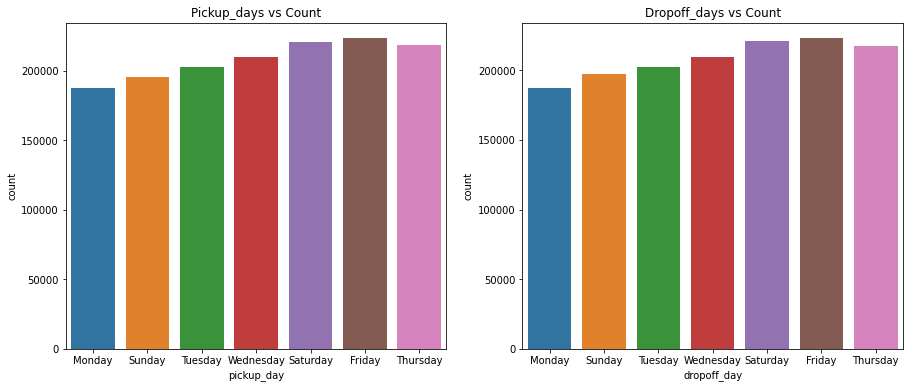

In [50]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x= "pickup_day", data=df)
fig.set_title("Pickup_days vs Count")
    
plt.subplot(1, 2, 2)
fig = sns.countplot(x= "dropoff_day", data= df)
fig.set_title("Dropoff_days vs Count")

Text(0.5, 1.0, 'Dropoff_hour vs Count')

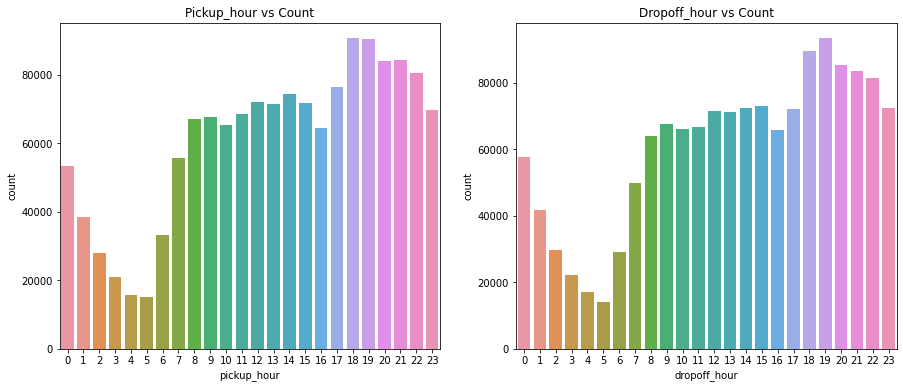

In [49]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x= "pickup_hour", data=df)
fig.set_title("Pickup_hour vs Count")
    
plt.subplot(1, 2, 2)
fig = sns.countplot(x= "dropoff_hour", data= df)
fig.set_title("Dropoff_hour vs Count")

Text(0.5, 1.0, 'Dropoff_time_of_the_day vs Count')

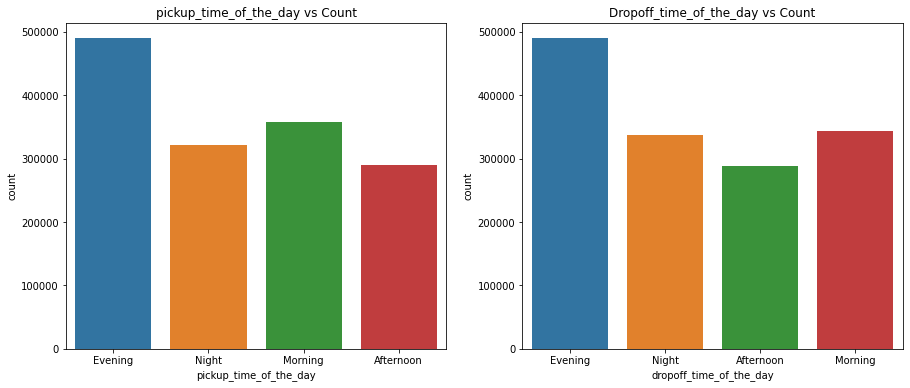

In [51]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x= "pickup_time_of_the_day", data=df)
fig.set_title("pickup_time_of_the_day vs Count")
    
plt.subplot(1, 2, 2)
fig = sns.countplot(x= "dropoff_time_of_the_day", data= df)
fig.set_title("Dropoff_time_of_the_day vs Count")

Text(0.5, 1.0, 'Dropoff_monthy vs Count')

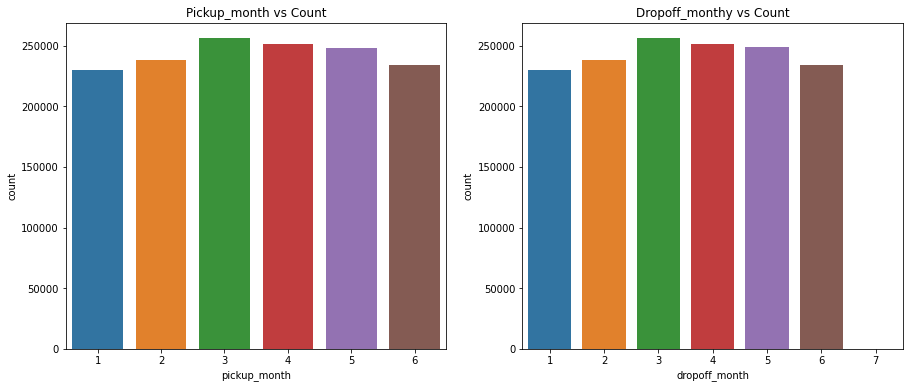

In [53]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x= "pickup_month", data=df)
fig.set_title("Pickup_month vs Count")
    
plt.subplot(1, 2, 2)
fig = sns.countplot(x= "dropoff_month", data= df)
fig.set_title("Dropoff_monthy vs Count")


## Bivariate analysis

In [63]:
sample_data = df.iloc[:100, :]

In [65]:
sample_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_time_of_the_day,dropoff_time_of_the_day,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,1,1,17,17,3,3,Evening,Evening,0.931139
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,0,0,0,0,6,6,Night,Night,1.121892
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,Tuesday,2,2,11,12,1,1,Morning,Afternoon,3.967522
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,3,3,19,19,4,4,Evening,Evening,0.923047
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,6,6,13,13,3,3,Afternoon,Afternoon,0.738556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,id3025098,2,2016-01-20 19:21:31,2016-01-20 19:31:27,1,-73.976982,40.750301,-73.999123,40.739510,N,...,Wednesday,3,3,19,19,1,1,Evening,Evening,1.378123
96,id3333094,2,2016-06-02 23:34:00,2016-06-02 23:41:15,1,-73.973465,40.755230,-73.977364,40.742821,N,...,Thursday,4,4,23,23,6,6,Night,Night,0.881345
97,id2228940,1,2016-02-04 13:22:02,2016-02-04 13:40:30,1,-73.981865,40.758774,-73.970222,40.784142,N,...,Thursday,4,4,13,13,2,2,Afternoon,Afternoon,1.855596
98,id2102594,1,2016-03-30 16:14:29,2016-03-30 17:01:33,1,-73.789841,40.643559,-73.970665,40.687279,N,...,Wednesday,3,3,16,17,3,3,Evening,Evening,9.946665


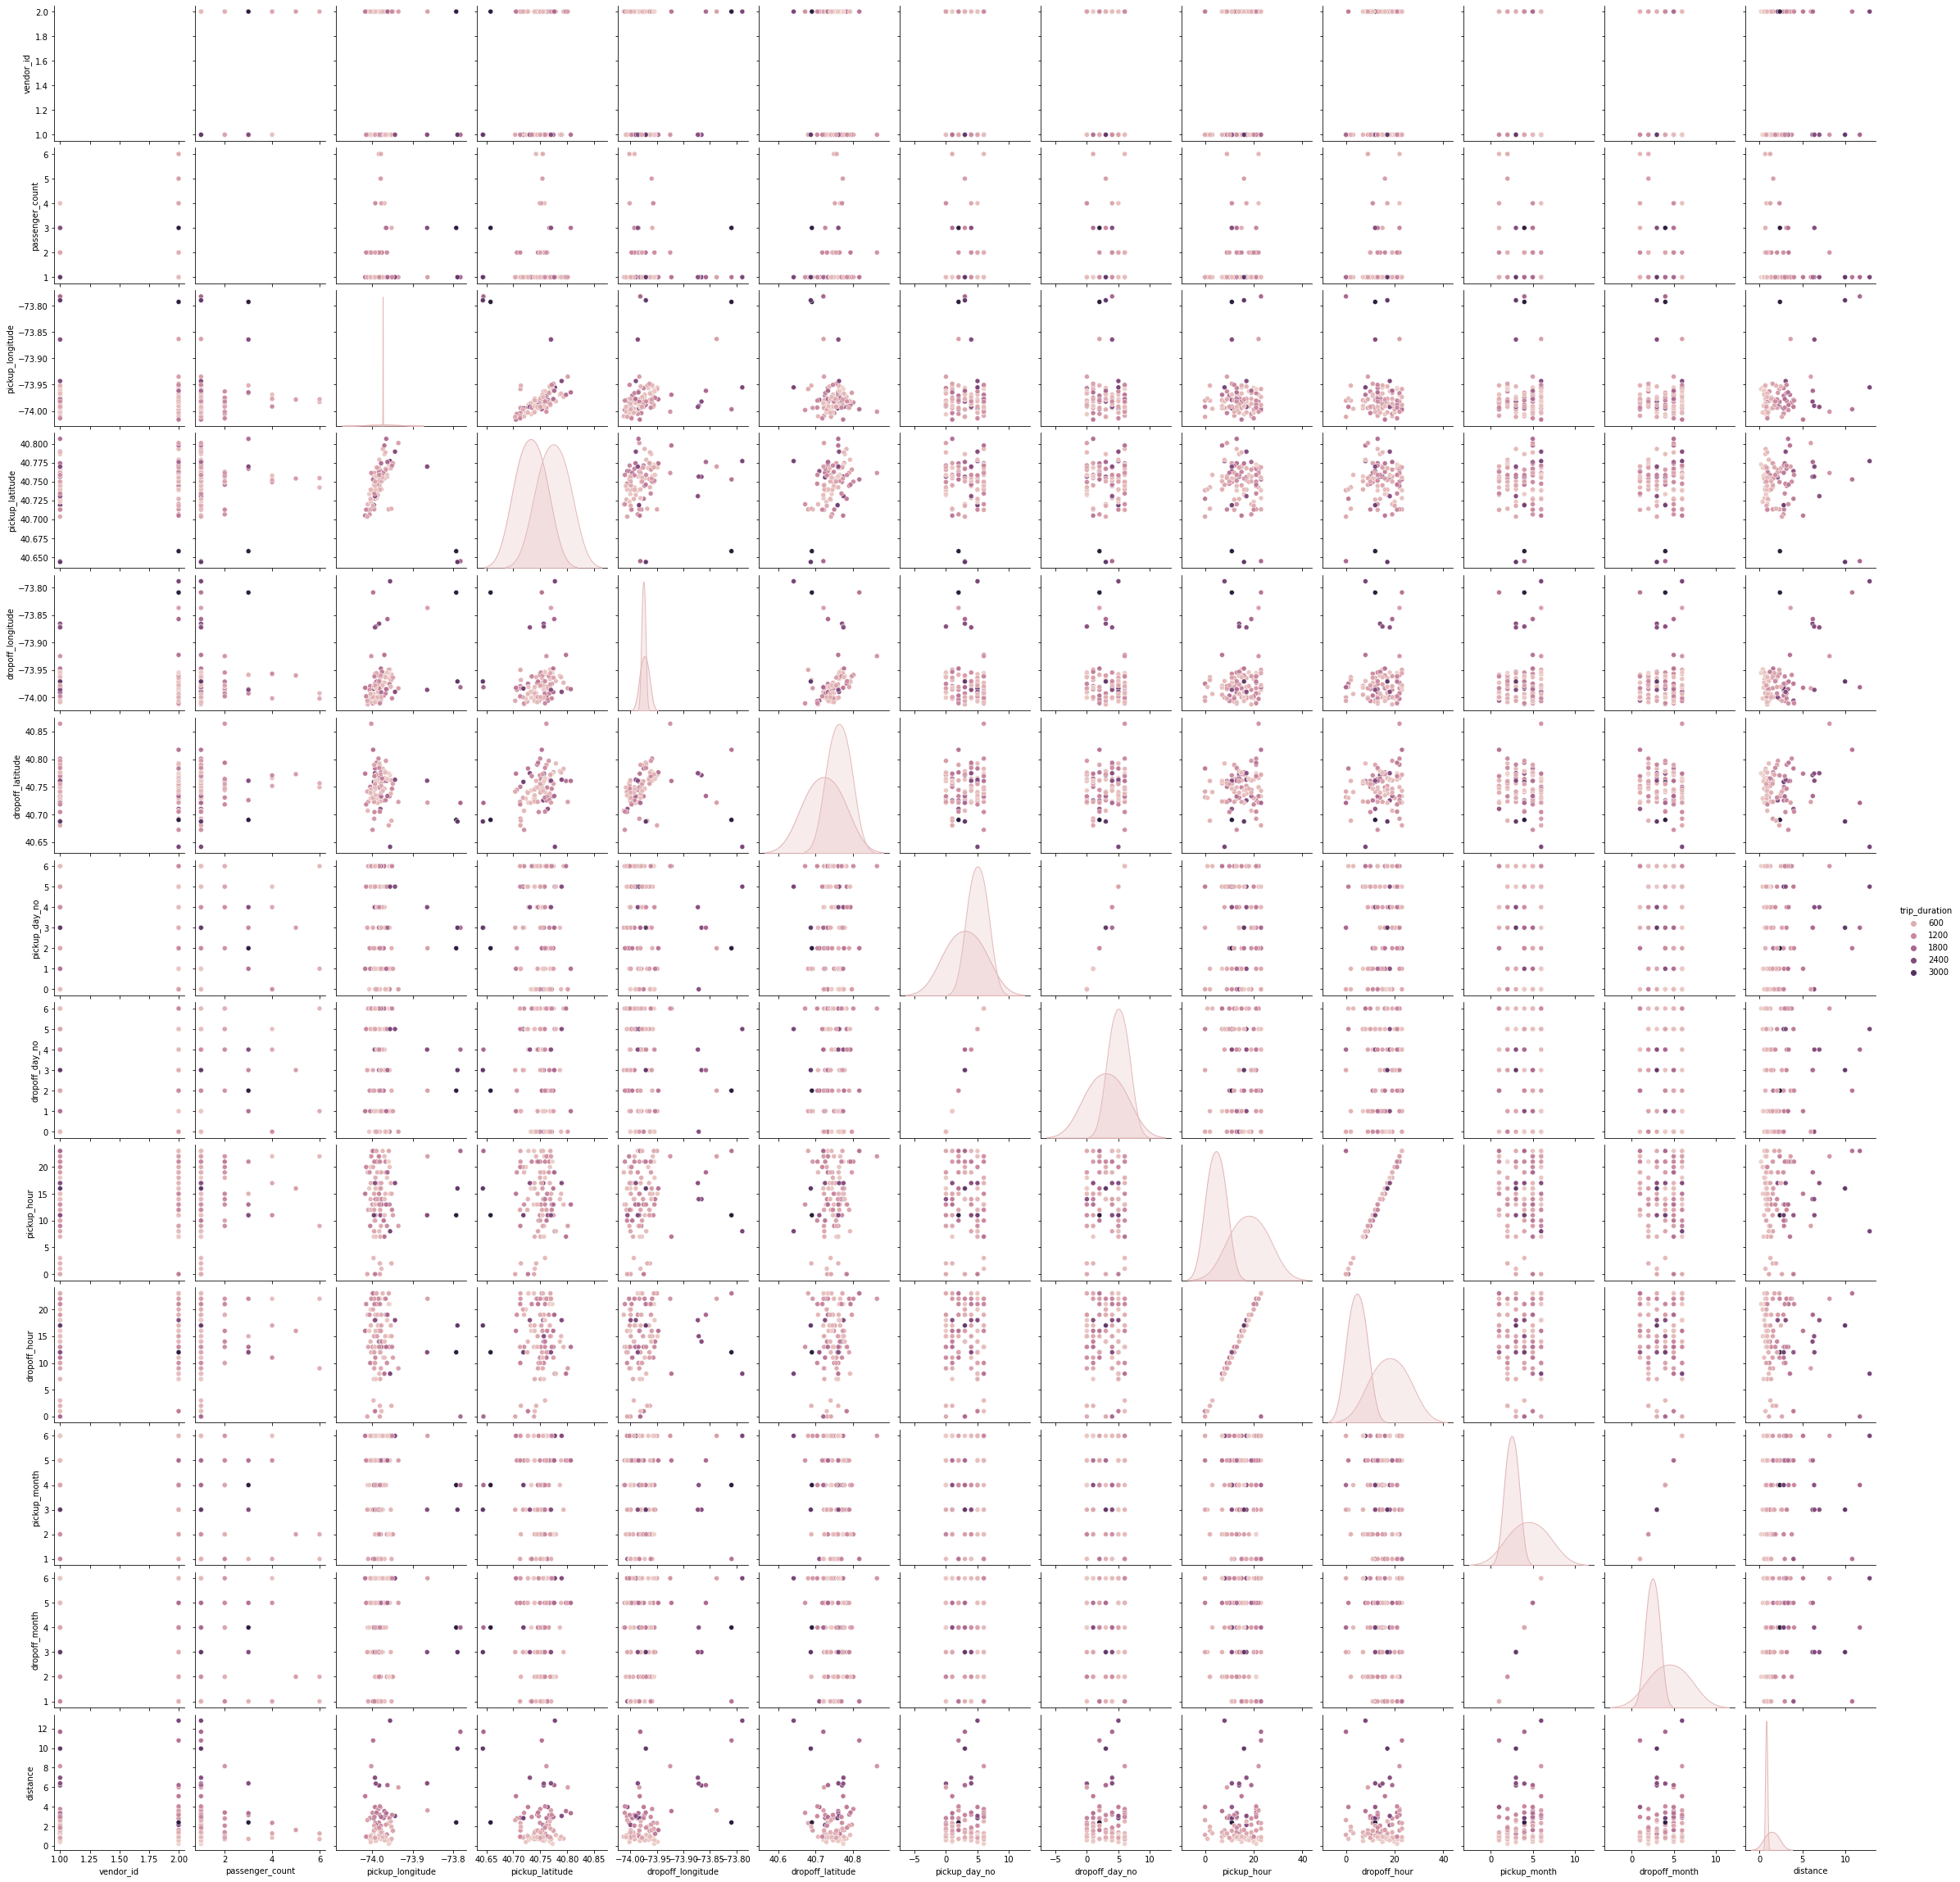

In [64]:
sns.pairplot(sample_data, hue= "trip_duration")

In the above plot we can see various pairs of featues and datapoints scattered with respect to Trip_Duration, We just took 100 samples out of 1.4 million dataset,now we go on to one by one bivariate analysis with respect to both trip_duration and distance feature

trip duration per vendor

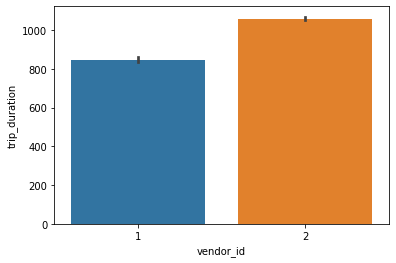

In [66]:
sns.barplot(x= "vendor_id", y="trip_duration",data=df)

trip duration per store and forward flag

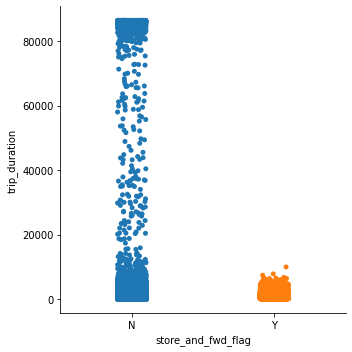

In [270]:
sns.catplot(x="store_and_fwd_flag",y="trip_duration",data=df, kind="strip")

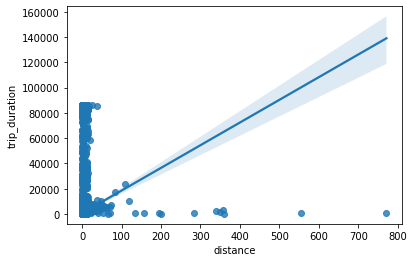

In [271]:
sns.regplot(x= "distance", y="trip_duration", data=df)